### Exploratory Data Analysis on E-Commerce Data from Kaggle
Data obtained from https://www.kaggle.com/datasets/carrie1/ecommerce-data/data. The goal is to do an exploratory data analysis on this dataset to identify certain issues with the data and to troubleshoot if there are any. Note that this exploration is on a cleaned dataset meaning no further cleaning might be needed.

[05/13/2025] Noting that this is for exploration purpose for now, will employ questions on the later part as I am focused on understanding the dataset as of date.

Questions:
1. What are the top-selling products by revenue and quantity?
2. Which countries contribute the most to sales?
3. Are there any seasonal or monthly trends in purchases?
4. What is the average order value (AOV) across countries?
5. How many customers are repeat buyers?
6. What time of day are most purchases made?
7. Are there outliers in unit prices or quantities? What might they indicate?
8. How much revenue is lost due to cancellations (negative quantities)?
9. Can we segment customers based on purchase behavior (e.g., RFM Analysis)?
10. What is the distribution of basket sizes per transaction?

#### Step 1: Initial setup and checks

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Pull in/load downloaded data and check summary statistics
data_df = pd.read_csv(
    'D:/python_projects/ml-projects-portfolio/exploratory_data_analysis/e-commerce_data/data.csv',
    encoding='latin1'
)
display(data_df.head())
#Checking for 
display(data_df.describe())
print(data_df.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


(541909, 8)


#### Step 2: Data Quality Assessment

<Axes: >

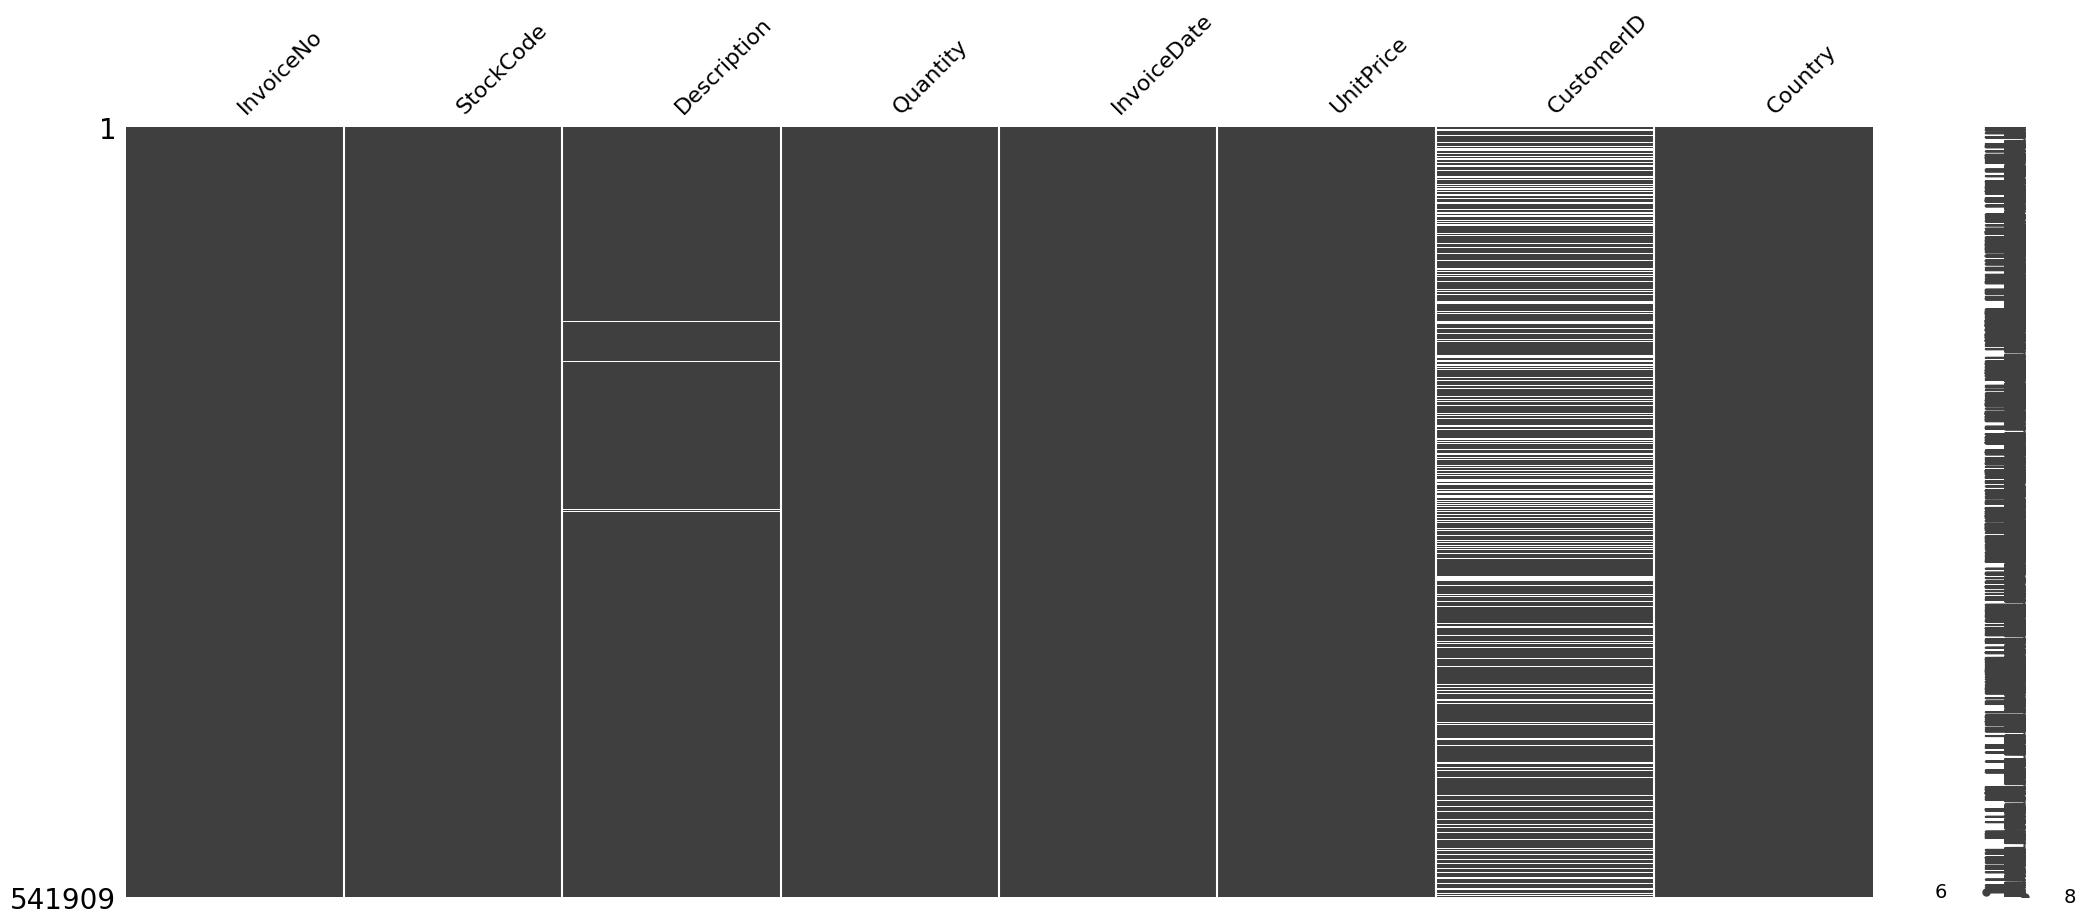

In [5]:
import missingno as msno
msno.matrix(data_df)


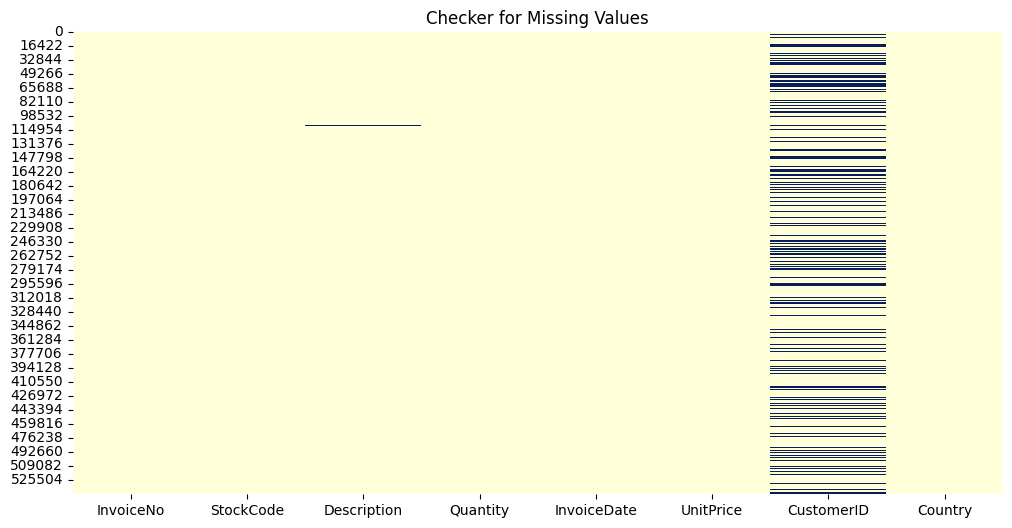

,Missing Count,Missing %
CustomerID,135080,24.926694
Description,1454,0.268311
StockCode,0,0.000000
InvoiceNo,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [3]:
# Identify the count of missing values per columns
missing_counts = data_df.isnull().sum()
missing_percentage = (data_df.isnull().sum() / len(data_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percentage
}).sort_values(by='Missing %', ascending=False)

#Visualize missing values and display table to check which columns have many missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data_df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Checker for Missing Values")
plt.show()
display(missing_df)

In [4]:
# Checking column data types to check which needs conversion
data_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
# Convert InvoiceDate to datetime
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'], errors='coerce')

#Convert to integer to make missing values null
data_df['CustomerID'] = data_df['CustomerID'].astype('Int64')

# To save computational memory
data_df['Country'] = data_df['Country'].astype('category')

data_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country              category
dtype: object

### Step 3: Univariate Analysis

In [6]:
#Do describe again to identify numeric columns (plus easier checking hehe)

#Define numberic and categorical columns first
numeric_cols = data_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data_df.select_dtypes(include=['object', 'category']).columns.tolist()

data_df[numeric_cols].describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.0
mean,9.552250,4.611114,15287.69057
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.0
25%,1.000000,1.250000,13953.0
50%,3.000000,2.080000,15152.0
75%,10.000000,4.130000,16791.0
max,80995.000000,38970.000000,18287.0


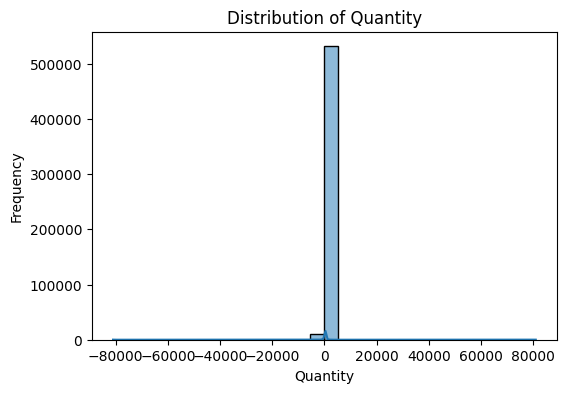

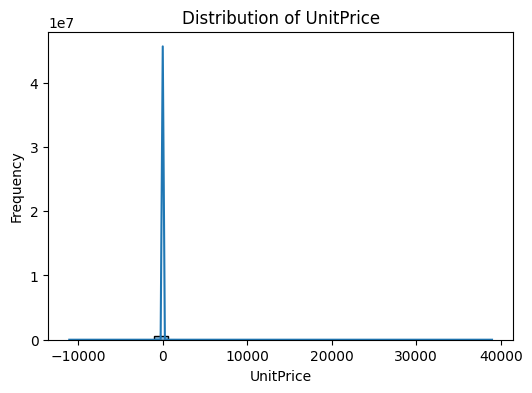

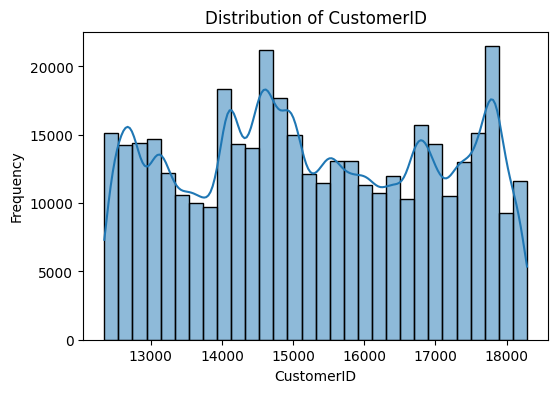

In [7]:
# Histogram to check distributions
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

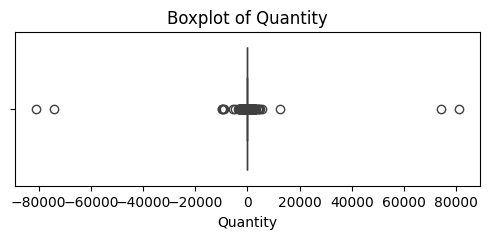

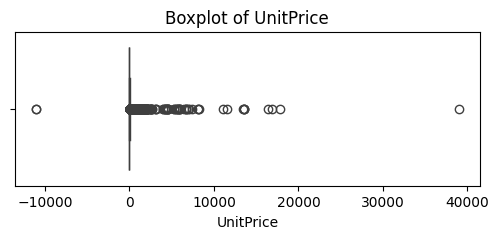

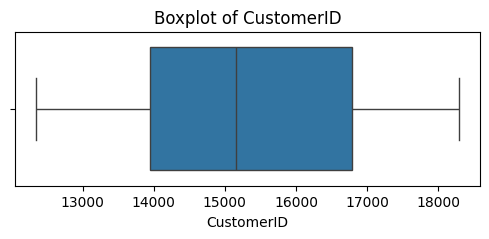

In [8]:
#Outlier detection for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [9]:
# Identify categorical columns
categorical_cols = data_df.select_dtypes(include=['object', 'category']).columns.tolist()
data_df[categorical_cols].describe()

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


Bivariate Analysis

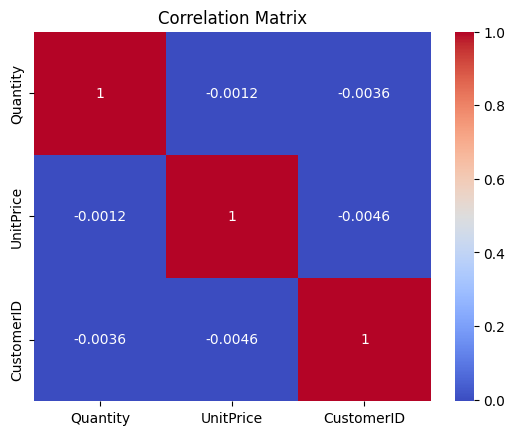

In [10]:
# Correlation matrix
sns.heatmap(data_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


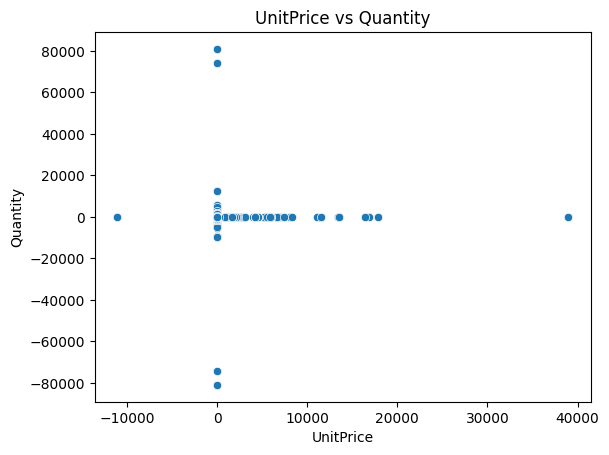

In [11]:
# Scatterplot 
sns.scatterplot(data=data_df, x='UnitPrice', y='Quantity')
plt.title("UnitPrice vs Quantity")
plt.show()

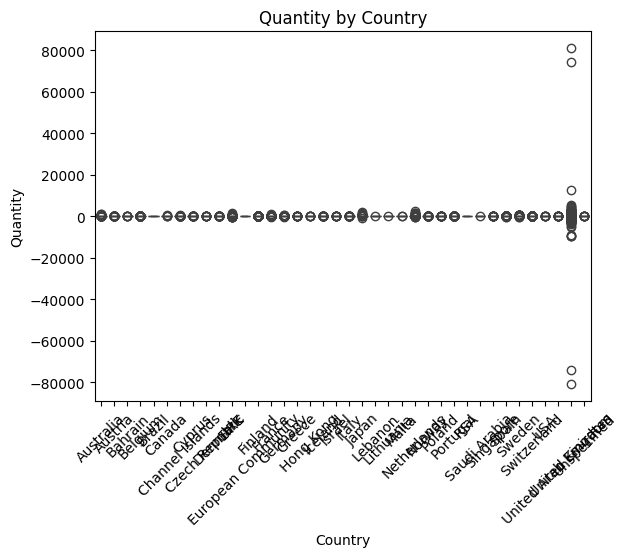

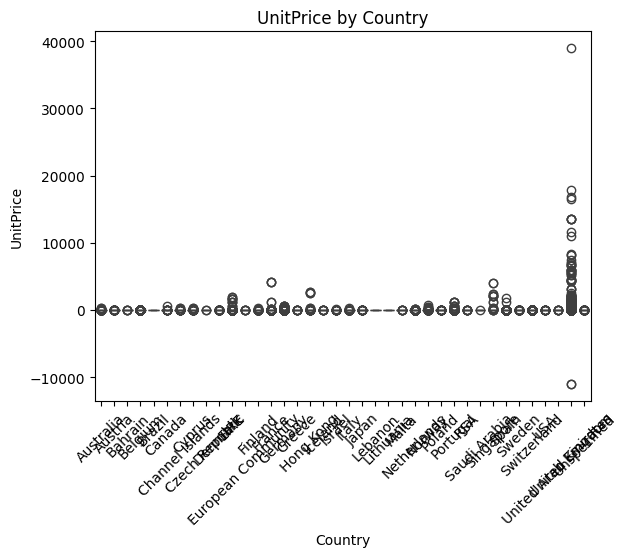

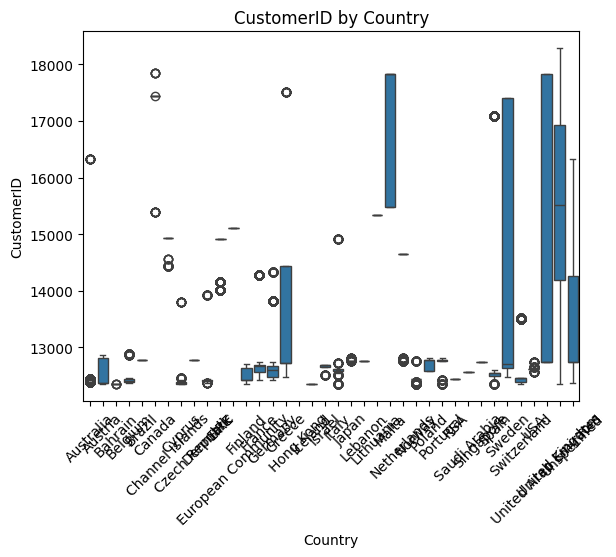

In [12]:
# Check categorical variables with few unique values
for i in categorical_cols:
    if data_df[i].nunique() <= 50:
        for n in numeric_cols:
            sns.boxplot(data=data_df, x=i, y=n)
            plt.title(f'{n} by {i}')
            plt.xticks(rotation=45)
            plt.show()

In [13]:
# Crosstab: Country vs. Stock Code?
display(pd.crosstab(data_df['Country'], data_df['StockCode']))



StockCode,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,...,0,0,14,0,0,0,0,0,0,0
Bahrain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,0,0,0,0,0,0,0,...,0,0,98,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0
Channel Islands,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0,0
Czech Republic,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [14]:
# Crosstab: Country vs. Quantity?
display(pd.crosstab(data_df['Country'], data_df['Quantity']))

Quantity,-80995,-74215,-9600,-9360,-9058,-5368,-4830,-3667,-3167,-3114,...,3114,3186,3906,4000,4300,4800,5568,12540,74215,80995
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bahrain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Channel Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Czech Republic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
top_codes = data_df['StockCode'].value_counts().nlargest(10).index
top = data_df[data_df['StockCode'].isin(top_codes)]
pd.crosstab(top['Country'], top['StockCode'])


StockCode,20725,20727,21212,22197,22423,22720,47566,84879,85099B,85123A
Country,,,,,,,,,,
Australia,9,4,2,0,6,10,8,0,5,1
Austria,0,0,1,0,2,0,1,2,1,0
Bahrain,0,0,0,0,1,0,0,0,0,0
Belgium,12,1,12,1,15,6,2,1,10,0
Brazil,0,0,0,0,1,0,0,0,0,0
Canada,0,1,0,0,1,0,0,1,0,0
Channel Islands,7,4,5,2,5,1,3,1,6,4
Cyprus,1,0,0,1,8,4,3,2,1,5
Denmark,0,0,0,0,0,0,1,0,0,0


<Axes: xlabel='Quantity', ylabel='UnitPrice'>

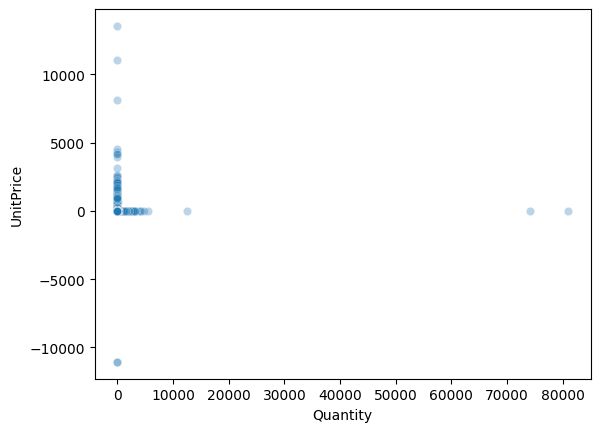

In [16]:
sns.scatterplot(data=data_df[data_df['Quantity'] > 0], x='Quantity', y='UnitPrice', alpha=0.3)


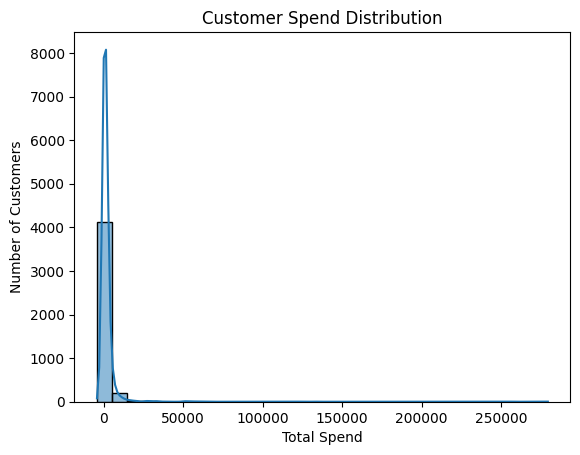

In [17]:
data_df['TotalPrice'] = data_df['Quantity'] * data_df['UnitPrice']
customer_spend = data_df.groupby('CustomerID')['TotalPrice'].sum()

sns.histplot(customer_spend, bins=30, kde=True)
plt.title('Customer Spend Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()


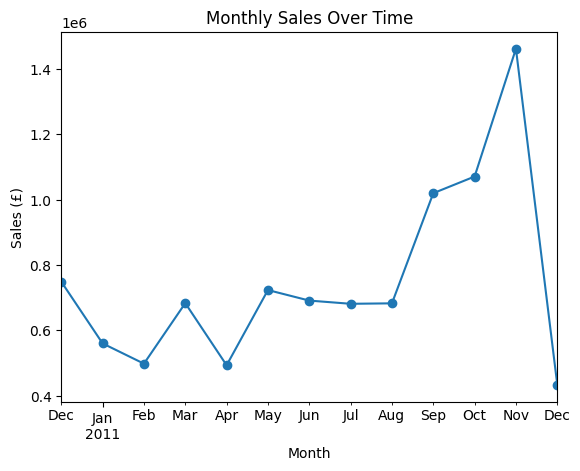

In [18]:
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'])
data_df['Month'] = data_df['InvoiceDate'].dt.to_period('M')
monthly_sales = data_df.groupby('Month')['TotalPrice'].sum()

monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.show()


Text(0.5, 1.0, 'Total Price by Hour')

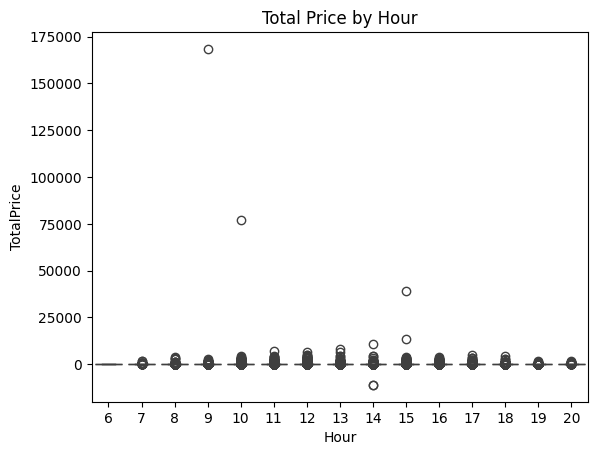

In [19]:
data_df['Hour'] = data_df['InvoiceDate'].dt.hour
sns.boxplot(x='Hour', y='TotalPrice', data=data_df[data_df['Quantity'] > 0])
plt.title('Total Price by Hour')

Text(0.5, 1.0, 'Customer Frequency vs Total Spend')

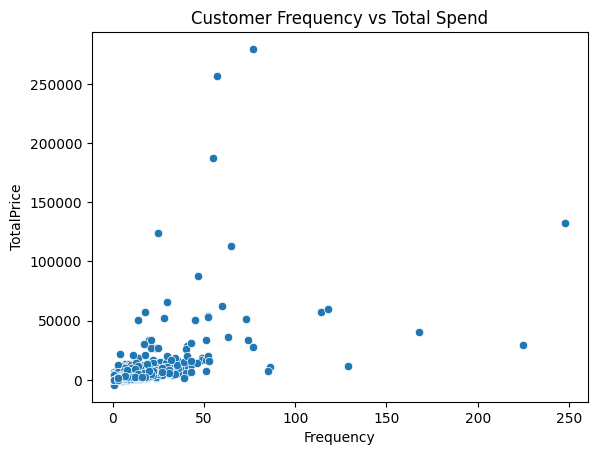

In [20]:
rfm = data_df.groupby('CustomerID').agg({
    'InvoiceDate': 'nunique',
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Frequency'})

sns.scatterplot(x='Frequency', y='TotalPrice', data=rfm)
plt.title('Customer Frequency vs Total Spend')


Outlier and Anomaly Detection

In [21]:
def detect_outliers_iqr(df, columns):
    outlier_dict = {}
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_dict[col] = outliers.shape[0]
    return outlier_dict


In [ ]:
numeric_columns = data_df.select_dtypes(include='number').columns.tolist()
outlier_counts = detect_outliers_iqr(data_df, numeric_columns)
outlier_counts


{'Quantity': 58619, 'UnitPrice': 39627, 'CustomerID': 0, 'TotalPrice': 44997, 'Hour': 0}


In [23]:
def detect_rare_categories(df, threshold=0.01):
    rare_cats = {}
    for col in df.select_dtypes(include='object'):
        freq = df[col].value_counts(normalize=True)
        rare = freq[freq < threshold]
        if not rare.empty:
            rare_cats[col] = rare
    return rare_cats


In [25]:
rare_category_results = detect_rare_categories(data_df, threshold=0.05)
rare_category_results

{'InvoiceNo': InvoiceNo
 573585     0.002056
 581219     0.001382
 581492     0.001349
 580729     0.001330
 558475     0.001301
              ...   
 581483     0.000002
 581566     0.000002
 C581499    0.000002
 C536383    0.000002
 C536379    0.000002
 Name: proportion, Length: 25900, dtype: float64,
 'StockCode': StockCode
 85123A    0.004268
 22423     0.004065
 85099B    0.003984
 47566     0.003187
 20725     0.003024
             ...   
 85179a    0.000002
 23617     0.000002
 90214U    0.000002
 47591b    0.000002
 72802c    0.000002
 Name: proportion, Length: 4070, dtype: float64,
 'Description': Description
 WHITE HANGING HEART T-LIGHT HOLDER    0.004383
 REGENCY CAKESTAND 3 TIER              0.004071
 JUMBO BAG RED RETROSPOT               0.003995
 PARTY BUNTING                         0.003195
 LUNCH BAG RED RETROSPOT               0.003031
                                         ...   
 ANT SILVER TURQUOISE BOUDICCA RING    0.000002
 Damages                              

In [26]:
def detect_invalid_zeros_negatives(df, cols):
    invalids = {}
    for col in cols:
        mask = df[col] <= 0
        if mask.any():
            invalids[col] = df[mask]
    return invalids

In [29]:
invalid_results = detect_invalid_zeros_negatives(data_df, cols=numeric_columns)
invalid_results

{'Quantity':        InvoiceNo StockCode                       Description  Quantity  \
 141      C536379         D                          Discount        -1   
 154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
 235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
 236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
 237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
 ...          ...       ...                               ...       ...   
 540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
 541541   C581499         M                            Manual        -1   
 541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
 541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
 541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   
 
                InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
 141

Feature Engineering

Initial Hypothesis and Insights

Summary Report